# **SINDy Analysis**

In [1]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as stat
from matplotlib.pylab import LinAlgError

# RHM Replication

In [2]:
# summary statistics

replication = pd.read_csv('../Outputs/SINDy_RHM.csv')
print('Mean R^2', np.mean(replication['R^2']))
print('SD R^2', np.std(replication['R^2']))
print('Median R^2',np.median(replication['R^2']))


Mean R^2 0.4347229377607167
SD R^2 0.19327229302381854
Median R^2 0.4377508088510634


Parameter Means (CR, EV, PE):  6.190074138055135 3.7159000935723028 10.552501259627148
Parameter SDs (CR, EV, PE):  47.31647682055802 20.221435138145715 19.057961660541313
CR > 0:  TtestResult(statistic=15.419341896053382, pvalue=3.3456603897174485e-53, df=13892)
EV > 0:  TtestResult(statistic=21.658802521676414, pvalue=2.455400360188325e-102, df=13892)
PE > 0:  TtestResult(statistic=65.26214608494722, pvalue=0.0, df=13892)
PE > EV:  TtestResult(statistic=29.49370484653406, pvalue=1.7031584819807824e-185, df=13892)


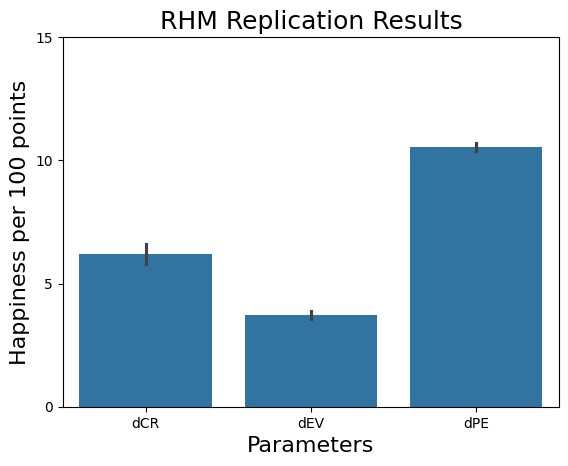

In [3]:
# generate bar chart

hp100 = []
hp100.append([i * 100 for i in replication['CR']])
hp100.append([i * 100 for i in replication['EV']])
hp100.append([i * 100 for i in replication['PE']])

CR = np.mean(hp100[0])
EV = np.mean(hp100[1])
PE = np.mean(hp100[2])

means =[CR, EV, PE]


terms = ['dCR', 'dEV', 'dPE', 'LA', 'CA']
variables = []
vals=[]
for i in range(0, len(hp100)):
    variables += len(hp100[i])*[terms[i]]
    for k in hp100[i]:
        vals.append(k) 
data = {
    "Variables":variables,
    "Values":vals
}

sns.barplot(data=data, x ="Variables", y="Values", errorbar="se")
plt.xlabel('Parameters', fontsize=16)
plt.ylabel('Happiness per 100 points', fontsize=16)
plt.ylim(0,15)
plt.yticks([0, 5, 10, 15])
plt.title('RHM Replication Results', fontsize=18)
plt.savefig('../Figures/SINDy_RHM' + '.png', dpi=1200)

# parameter statistics
print('Parameter Means (CR, EV, PE): ', CR, EV, PE)
print('Parameter SDs (CR, EV, PE): ', np.std(hp100[0]*100), np.std(hp100[1]*100), np.std(hp100[2]*100))
print('CR > 0: ', stat.ttest_1samp(hp100[0], 0))
print('EV > 0: ',stat.ttest_1samp(hp100[1], 0))
print('PE > 0: ',stat.ttest_1samp(hp100[2], 0))
print('PE > EV: ',stat.ttest_rel(hp100[2], hp100[1]))

# DynAffect-C

In [4]:
# summary statistics

DC = pd.read_csv('../Outputs/SINDy_DC.csv')
print('Mean R^2', np.mean(DC['R^2']))
print('SD R^2', np.std(DC['R^2']))
print('Median R^2',np.median(DC['R^2']))

Mean R^2 0.6192599274717375
SD R^2 0.19754300740906072
Median R^2 0.6465263203399316


Means (CR, EV, PE, LA, CA):  4.252350104369107 2.9667530410998344 8.720247606708414 31.825055783488086 33.75887857194271
Standard Deviations (CR, EV, PE, LA, CA):  38.612157241004816 15.472513954133996 14.908899040270454 34.49647394668504 300.7453534318275
Percent Included (CR, EV, PE, LA, CA):  0.9056200584087186 0.9153073580739369 0.9487142958900207 0.7393689009188689 0.708526248308284
LA > 0:  TtestResult(statistic=108.73687682606634, pvalue=0.0, df=13892)
CA > 0:  TtestResult(statistic=13.230354244947923, pvalue=1.0189688767090022e-39, df=13892)
CR > 0:  TtestResult(statistic=12.980377855685813, pvalue=2.6401952601060215e-38, df=13892)
EV > 0:  TtestResult(statistic=22.599711779056783, pvalue=4.341887727383148e-111, df=13892)
PE > 0:  TtestResult(statistic=68.93910329862406, pvalue=0.0, df=13892)
PE > EV:  TtestResult(statistic=32.63141658000639, pvalue=4.1366640139639905e-225, df=13892)


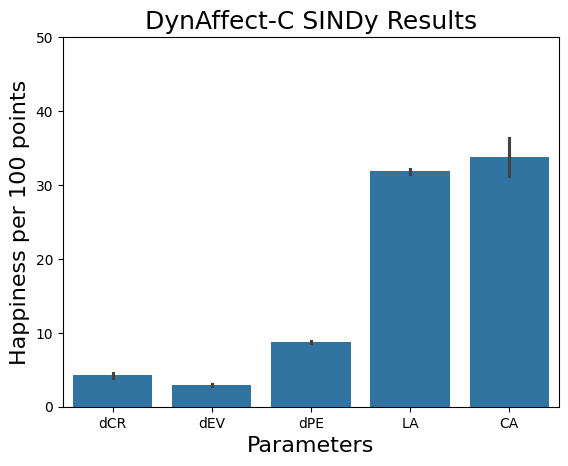

In [5]:
# generate bar chart

hp100 = []
hp100.append([i *100 for i in DC['CR']])
hp100.append([i *100 for i in DC['EV']])
hp100.append([i *100 for i in DC['PE']])
hp100.append([i *100 for i in DC['LA']])
hp100.append([i *100 for i in DC['CA']])

CR = np.mean(hp100[0])
EV = np.mean(hp100[1])
PE = np.mean(hp100[2])
LA = np.mean(hp100[3])
CA = np.mean(hp100[4])

terms = ['dCR', 'dEV', 'dPE', 'LA', 'CA']
variables = []
vals=[]
for i in range(0, len(hp100)):
    variables += len(hp100[i])*[terms[i]]
    for k in hp100[i]:
        vals.append(k) 
data = {
    "Variables":variables,
    "Values":vals
}

sns.barplot(data=data, x ="Variables", y="Values", errorbar="se")
plt.xlabel('Parameters', fontsize=16)
plt.ylabel('Happiness per 100 points', fontsize=16)
plt.ylim(0,15)
plt.yticks([0, 10, 20, 30, 40, 50])
plt.title('DynAffect-C SINDy Results', fontsize=18)
plt.savefig('../Figures/SINDy_DC' + '.png', dpi=1200)

# print parameter statistics
print('Means (CR, EV, PE, LA, CA): ', CR, EV, PE, LA, CA)
print('Standard Deviations (CR, EV, PE, LA, CA): ', np.std(hp100[0]), np.std(hp100[1]), np.std(hp100[2]), np.std(hp100[3]), np.std(hp100[4]))
print('Percent Included (CR, EV, PE, LA, CA): ', 12714/14039, 12850/14039, 13319/14039, 10380/14039, 9947/14039)
print('LA > 0: ',stat.ttest_1samp(hp100[3], 0))
print('CA > 0: ',stat.ttest_1samp(hp100[4], 0))
print('CR > 0: ', stat.ttest_1samp(hp100[0], 0))
print('EV > 0: ',stat.ttest_1samp(hp100[1], 0))
print('PE > 0: ',stat.ttest_1samp(hp100[2], 0))
print('PE > EV: ',stat.ttest_rel(hp100[2], hp100[1]))

# Model Comparison

R^2 Difference:  TtestResult(statistic=-129.21926134085456, pvalue=0.0, df=13892)
Cohen's d (change in R^2): -0.944


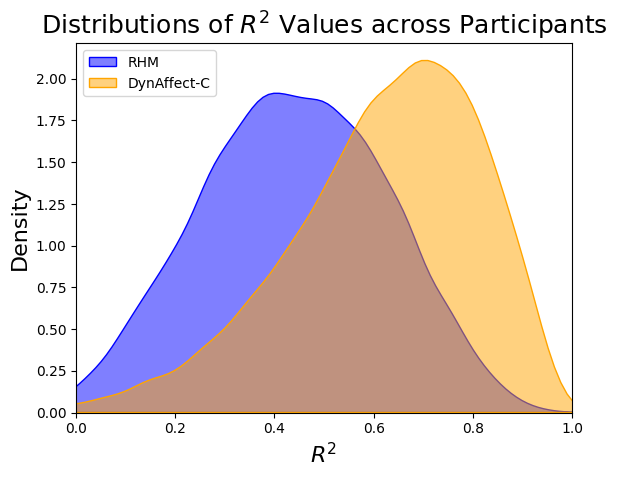

In [6]:
# generate KDE plot

def cohen_d(group1, group2):
    mean1 = np.mean(group1)
    mean2 = np.mean(group2)
    std1 = np.std(group1, ddof=1)  # sample std
    std2 = np.std(group2, ddof=1)

    # pooled standard deviation
    n1, n2 = len(group1), len(group2)
    pooled_std = np.sqrt(((n1 - 1)*std1**2 + (n2 - 1)*std2**2) / (n1 + n2 - 2))

    # cohen's d
    cohens_d = (mean1 - mean2) / pooled_std
    return cohens_d

print('R^2 Difference: ', stat.ttest_rel(replication['R^2'], DC['R^2']))
print(f"Cohen's d (change in R^2): {cohen_d(replication['R^2'], DC['R^2']):.3f}")

sns.kdeplot(replication['R^2'], fill=True, alpha=0.5, color='blue', label='RHM')
sns.kdeplot(DC['R^2'], fill=True, alpha=0.5, color='orange', label='DynAffect-C')

plt.title('Distributions of $R^2$ Values across Participants', fontsize=18)
plt.xlabel('$R^2$', fontsize=16)
plt.ylabel('Density', fontsize=16)
plt.xlim([0, 1])

plt.legend(loc='upper left')
plt.savefig('../Figures/SINDy_comp' + '.png', dpi=1200)
plt.show()